<center> <h1> Selecting the best GAN architecture (tunning parameters)</h1>

<b>Autor:</b> Edwin Rueda <br>
<b>email:</b> ejrueda95g@gmail.com <br>
<b>github:</b> https://github.com/ejrueda <br>
<b>website:</b> http://edwinrueda.com/ <br>
<b> You can cite this work with</b>:

@software{edwin_rueda_2020_3843381,<br>
  author       = {Edwin Rueda},<br>
  title        = {ejrueda/MasterUFPA: zenodo release},<br>
  month        = may,<br>
  year         = 2020,<br>
  publisher    = {Zenodo},<br>
  version      = {zenodo},<br>
  doi          = {10.5281/zenodo.3843381},<br>
  url          = {https://doi.org/10.5281/zenodo.3843381}<br>
}

In [270]:
from utilities import EdwinRueda_utils
import tensorflow as tf
import numpy as np
import pandas as pd
from time import time
import matplotlib
import sklearn
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score
from sklearn.decomposition import PCA
tf.keras.backend.set_floatx('float64')
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from bokeh.plotting import figure, show
from bokeh.io import output_notebook, export_svgs
from bokeh.transform import jitter
from bokeh.models import ColumnDataSource
%matplotlib inline
output_notebook()
print("tensorflow version: ", tf.__version__)
print("numpy version: ", np.__version__)
print("matplotlib version: ", matplotlib.__version__)
print("sklearn version: ", sklearn.__version__)

Loading BokehJS ...

tensorflow version:  2.2.0
numpy version:  1.18.1
matplotlib version:  3.1.1
sklearn version:  0.23.2


In [2]:
data = pd.read_csv("../data/all_counts_9_norm_rpkm_log2_preprocessed.csv", index_col=0)
data.head()

,BB9,BB10,BB17,BB19,BB20,BB21,BB11,BB12,BB18
gene,,,,,,,,,
aaeA,5.542667,5.876225,5.189101,6.178741,6.258982,5.921482,6.565341,6.308676,6.256590
aaeB,5.627977,5.436188,5.397088,5.493631,5.603751,5.716862,5.840627,6.132819,5.896502
aaeR,5.645506,5.758852,5.107190,5.824890,5.487705,6.033795,5.710782,6.302440,16.270368
aaeX,6.081770,6.043589,6.030808,6.358792,15.682419,6.129392,6.042647,6.134309,15.797839
aas,6.224669,6.297153,6.297008,6.047021,6.038410,6.296795,6.295251,6.598525,6.568365


In [3]:
rg = open("../data/reference_genes.txt").read().splitlines()
print(rg)

['cysG', 'hcaT', 'idnT', 'rrsA', 'ihfB', 'ssrA', 'gyrA', 'recA', 'rpoB', 'rpoA', 'gyrB', 'rho', 'ftsZ', 'secA', 'rpoC', 'gmk', 'adk', 'rpoD', 'dnaG', 'glnA', 'recF']


In [4]:
rg_data = data.reindex(rg).dropna()
rg_data

,BB9,BB10,BB17,BB19,BB20,BB21,BB11,BB12,BB18
gene,,,,,,,,,
cysG,5.903687,5.879490,5.873191,5.735536,6.016590,6.328393,6.315338,6.504277,6.577601
hcaT,5.692781,5.733848,5.686571,5.925712,6.290692,6.131968,6.113390,5.891730,5.822536
rrsA,10.498560,10.775182,11.515848,11.819169,11.745607,11.033925,10.521316,8.685239,10.590185
ihfB,11.625723,11.784312,12.694811,13.119308,13.096534,12.574847,12.140031,10.126885,11.298441
ssrA,12.889916,13.026561,13.839784,14.807551,14.601034,13.858224,14.509441,12.713618,13.816964
gyrA,19.364537,19.544602,10.195372,19.601927,19.576949,18.693722,17.988391,16.700954,17.802523
recA,16.741059,16.808839,17.125494,11.214665,10.997956,10.271486,19.879175,18.190008,19.661178
rpoB,8.974988,19.071784,10.029701,19.552264,19.479836,18.539912,8.439041,16.884159,18.085799
rpoA,12.169900,12.425077,13.123721,12.536993,12.467720,11.604108,11.477677,19.684894,11.166540


In [5]:
scaler = EdwinRueda_utils.scaler(xmin=-1, xmax=1)
scaler.fit(rg_data)
rg_data = scaler.transform(rg_data)
print("Reference genes scaled: ")
rg_data

Reference genes scaled: 


,BB9,BB10,BB17,BB19,BB20,BB21,BB11,BB12,BB18
gene,,,,,,,,,
cysG,-0.969147,-0.978963,-0.973373,-1.000000,-1.000000,-0.970143,-0.970659,-0.911181,-0.890876
hcaT,-1.000000,-1.000000,-1.000000,-0.972570,-0.959573,-1.000000,-1.000000,-1.000000,-1.000000
rrsA,-0.296977,-0.271812,-0.168266,-0.122535,-0.155035,-0.254901,-0.359582,-0.594943,-0.310966
ihfB,-0.132088,-0.126050,-0.000049,0.064988,0.044212,-0.020681,-0.124403,-0.385905,-0.208607
ssrA,0.052847,0.053385,0.163319,0.308490,0.266109,0.174393,0.219843,-0.010831,0.155377
gyrA,1.000000,0.994874,-0.356674,1.000000,1.000000,0.909390,0.725292,0.567331,0.731382
recA,0.616219,0.599711,0.632131,-0.209725,-0.265305,-0.370792,1.000000,0.783242,1.000000
rpoB,-0.519856,0.926579,-0.380312,0.992837,0.985677,0.886011,-0.662111,0.593895,0.772322
rpoA,-0.052482,-0.033495,0.061149,-0.019001,-0.048531,-0.168233,-0.220635,1.000000,-0.227669


### bulding the best GAN architecture

In [516]:
noise_shape = 100
#generator network
G = Sequential()
G.add(Dense(50, input_shape=(noise_shape,), activation="tanh"))
G.add(Dense(150, activation="tanh"))
G.add(Dropout(.15))
G.add(Dense(150, activation="tanh"))
#G.add(Dropout(.15))
#G.add(Dense(30, activation="tanh"))
G.add(Dense(rg_data.shape[1], activation="tanh"))

#discriminator network
D = Sequential()
#D.add(Dense(rg_data.shape[1], input_shape=(rg_data.shape[1],)))
D.add(Dense(60, input_shape=(rg_data.shape[1],)))
D.add(tf.keras.layers.LeakyReLU(alpha=.1))
D.add(Dropout(.15))
D.add(Dense(40))
D.add(Dropout(.1))
D.add(Dense(1, activation="sigmoid"))

In [517]:
noise_vector = tf.random.normal((4, noise_shape), dtype=tf.float64)
print("synthetic samples: ")
synthetic_samples = G(noise_vector)
print(synthetic_samples)
print("----------------------------------------")
print("prediction of the discriminator network")
print("----------------------------------------")
D(synthetic_samples)

synthetic samples: 
tf.Tensor(
[[ 0.05779591  0.14684494  0.58669015  0.62687365 -0.19425423  0.03451765
  -0.16844746 -0.68463717 -0.14168747]
 [-0.30809727  0.02889339 -0.45680311  0.22783781  0.43598034 -0.56410422
   0.05511881  0.06507698 -0.17945481]
 [-0.10044482 -0.67469204  0.1726901   0.38322484 -0.05643738  0.3256936
  -0.5891273   0.62897999 -0.38599845]
 [-0.29371253  0.60181052  0.00514297  0.11161937  0.24368978 -0.47307179
  -0.406266   -0.37696278 -0.42275867]], shape=(4, 9), dtype=float64)
----------------------------------------
prediction of the discriminator network
----------------------------------------


<tf.Tensor: shape=(4, 1), dtype=float64, numpy=
array([[0.48714805],
       [0.50915634],
       [0.61735742],
       [0.47385165]])>

In [518]:
gan_utils = EdwinRueda_utils.gan_utils()
epochs = 1500
optimizerG = tf.optimizers.SGD(lr=.00013, momentum=.92, decay=.00013/epochs)
optimizerD = tf.optimizers.SGD(lr=.0015, momentum=.9, decay=.0015/epochs)
accumulated_gloss, accumulated_dloss = gan_utils.train(rg_data, G, D, noise_input=noise_shape, epochs=epochs,
                                                       batch_size=rg_data.shape[0], optimizerG=optimizerG,
                                                       optimizerD=optimizerD)

epochs[0:1500] :: G_loss[0.670101] :: D_loss[0.698024] :: time:0.802710[s]
epochs[1:1500] :: G_loss[0.724096] :: D_loss[0.653513] :: time:0.012154[s]
epochs[2:1500] :: G_loss[0.659581] :: D_loss[0.695924] :: time:0.012105[s]
epochs[3:1500] :: G_loss[0.655773] :: D_loss[0.682312] :: time:0.011996[s]
epochs[4:1500] :: G_loss[0.727278] :: D_loss[0.647961] :: time:0.012044[s]
epochs[5:1500] :: G_loss[0.677717] :: D_loss[0.681577] :: time:0.011902[s]
epochs[6:1500] :: G_loss[0.720129] :: D_loss[0.655574] :: time:0.012071[s]
epochs[7:1500] :: G_loss[0.763856] :: D_loss[0.619822] :: time:0.012013[s]
epochs[8:1500] :: G_loss[0.721255] :: D_loss[0.633254] :: time:0.012292[s]
epochs[9:1500] :: G_loss[0.750016] :: D_loss[0.613249] :: time:0.012133[s]
epochs[10:1500] :: G_loss[0.696672] :: D_loss[0.674880] :: time:0.012167[s]
epochs[11:1500] :: G_loss[0.604565] :: D_loss[0.704200] :: time:0.012269[s]
epochs[12:1500] :: G_loss[0.720609] :: D_loss[0.653402] :: time:0.012058[s]
epochs[13:1500] :: G_l

epochs[113:1500] :: G_loss[0.890979] :: D_loss[0.513299] :: time:0.018031[s]
epochs[114:1500] :: G_loss[0.849458] :: D_loss[0.517787] :: time:0.020618[s]
epochs[115:1500] :: G_loss[0.791455] :: D_loss[0.553048] :: time:0.016516[s]
epochs[116:1500] :: G_loss[0.716938] :: D_loss[0.595530] :: time:0.015564[s]
epochs[117:1500] :: G_loss[0.832152] :: D_loss[0.526914] :: time:0.013025[s]
epochs[118:1500] :: G_loss[0.747105] :: D_loss[0.587980] :: time:0.012254[s]
epochs[119:1500] :: G_loss[0.806948] :: D_loss[0.530276] :: time:0.012185[s]
epochs[120:1500] :: G_loss[0.746834] :: D_loss[0.581122] :: time:0.012110[s]
epochs[121:1500] :: G_loss[0.827886] :: D_loss[0.518694] :: time:0.012293[s]
epochs[122:1500] :: G_loss[0.808095] :: D_loss[0.528591] :: time:0.012062[s]
epochs[123:1500] :: G_loss[0.786789] :: D_loss[0.542232] :: time:0.012269[s]
epochs[124:1500] :: G_loss[0.827352] :: D_loss[0.558217] :: time:0.012151[s]
epochs[125:1500] :: G_loss[0.741295] :: D_loss[0.577545] :: time:0.012223[s]

epochs[228:1500] :: G_loss[1.004311] :: D_loss[0.499291] :: time:0.013256[s]
epochs[229:1500] :: G_loss[0.911934] :: D_loss[0.505789] :: time:0.015619[s]
epochs[230:1500] :: G_loss[0.816549] :: D_loss[0.555955] :: time:0.012777[s]
epochs[231:1500] :: G_loss[0.911358] :: D_loss[0.526577] :: time:0.012261[s]
epochs[232:1500] :: G_loss[0.930897] :: D_loss[0.533556] :: time:0.012290[s]
epochs[233:1500] :: G_loss[0.965851] :: D_loss[0.504386] :: time:0.012025[s]
epochs[234:1500] :: G_loss[0.902320] :: D_loss[0.498113] :: time:0.011871[s]
epochs[235:1500] :: G_loss[0.923138] :: D_loss[0.492572] :: time:0.012100[s]
epochs[236:1500] :: G_loss[0.993420] :: D_loss[0.482442] :: time:0.012076[s]
epochs[237:1500] :: G_loss[0.929664] :: D_loss[0.487901] :: time:0.012273[s]
epochs[238:1500] :: G_loss[0.766926] :: D_loss[0.594971] :: time:0.012239[s]
epochs[239:1500] :: G_loss[0.924595] :: D_loss[0.499636] :: time:0.012195[s]
epochs[240:1500] :: G_loss[0.763958] :: D_loss[0.571656] :: time:0.012194[s]

epochs[345:1500] :: G_loss[1.023033] :: D_loss[0.500913] :: time:0.016151[s]
epochs[346:1500] :: G_loss[1.033387] :: D_loss[0.477039] :: time:0.013667[s]
epochs[347:1500] :: G_loss[1.020798] :: D_loss[0.480013] :: time:0.018249[s]
epochs[348:1500] :: G_loss[1.103855] :: D_loss[0.463703] :: time:0.012344[s]
epochs[349:1500] :: G_loss[1.079296] :: D_loss[0.444772] :: time:0.012070[s]
epochs[350:1500] :: G_loss[0.942316] :: D_loss[0.500338] :: time:0.012201[s]
epochs[351:1500] :: G_loss[0.879724] :: D_loss[0.572517] :: time:0.011922[s]
epochs[352:1500] :: G_loss[1.048008] :: D_loss[0.481159] :: time:0.012642[s]
epochs[353:1500] :: G_loss[0.856175] :: D_loss[0.543614] :: time:0.013594[s]
epochs[354:1500] :: G_loss[0.932249] :: D_loss[0.511423] :: time:0.012102[s]
epochs[355:1500] :: G_loss[1.018132] :: D_loss[0.488828] :: time:0.012038[s]
epochs[356:1500] :: G_loss[0.872298] :: D_loss[0.558254] :: time:0.012248[s]
epochs[357:1500] :: G_loss[1.056557] :: D_loss[0.490423] :: time:0.012282[s]

epochs[462:1500] :: G_loss[0.893875] :: D_loss[0.641433] :: time:0.013828[s]
epochs[463:1500] :: G_loss[1.011155] :: D_loss[0.530140] :: time:0.013836[s]
epochs[464:1500] :: G_loss[1.033175] :: D_loss[0.533372] :: time:0.012341[s]
epochs[465:1500] :: G_loss[1.052289] :: D_loss[0.550238] :: time:0.012258[s]
epochs[466:1500] :: G_loss[1.053652] :: D_loss[0.507147] :: time:0.012091[s]
epochs[467:1500] :: G_loss[1.033852] :: D_loss[0.565552] :: time:0.012469[s]
epochs[468:1500] :: G_loss[1.088354] :: D_loss[0.488082] :: time:0.012181[s]
epochs[469:1500] :: G_loss[1.079016] :: D_loss[0.506933] :: time:0.012244[s]
epochs[470:1500] :: G_loss[1.141848] :: D_loss[0.485000] :: time:0.012382[s]
epochs[471:1500] :: G_loss[1.023723] :: D_loss[0.514128] :: time:0.012242[s]
epochs[472:1500] :: G_loss[1.261463] :: D_loss[0.466969] :: time:0.012025[s]
epochs[473:1500] :: G_loss[0.914552] :: D_loss[0.587088] :: time:0.012050[s]
epochs[474:1500] :: G_loss[1.021468] :: D_loss[0.514318] :: time:0.012367[s]

epochs[581:1500] :: G_loss[1.047810] :: D_loss[0.530612] :: time:0.017592[s]
epochs[582:1500] :: G_loss[1.052312] :: D_loss[0.589130] :: time:0.013723[s]
epochs[583:1500] :: G_loss[1.013321] :: D_loss[0.553373] :: time:0.012169[s]
epochs[584:1500] :: G_loss[1.100318] :: D_loss[0.529813] :: time:0.017349[s]
epochs[585:1500] :: G_loss[0.971619] :: D_loss[0.580079] :: time:0.014453[s]
epochs[586:1500] :: G_loss[0.920633] :: D_loss[0.606096] :: time:0.017518[s]
epochs[587:1500] :: G_loss[1.018897] :: D_loss[0.599679] :: time:0.018699[s]
epochs[588:1500] :: G_loss[0.980381] :: D_loss[0.558621] :: time:0.015849[s]
epochs[589:1500] :: G_loss[1.052941] :: D_loss[0.536228] :: time:0.012226[s]
epochs[590:1500] :: G_loss[0.915765] :: D_loss[0.637271] :: time:0.012479[s]
epochs[591:1500] :: G_loss[0.996880] :: D_loss[0.545542] :: time:0.012290[s]
epochs[592:1500] :: G_loss[0.918287] :: D_loss[0.623120] :: time:0.012259[s]
epochs[593:1500] :: G_loss[0.966473] :: D_loss[0.571825] :: time:0.012282[s]

epochs[696:1500] :: G_loss[1.041483] :: D_loss[0.578981] :: time:0.013484[s]
epochs[697:1500] :: G_loss[1.036573] :: D_loss[0.622540] :: time:0.013525[s]
epochs[698:1500] :: G_loss[0.932557] :: D_loss[0.604518] :: time:0.012540[s]
epochs[699:1500] :: G_loss[0.859730] :: D_loss[0.700976] :: time:0.012288[s]
epochs[700:1500] :: G_loss[1.053140] :: D_loss[0.590138] :: time:0.012179[s]
epochs[701:1500] :: G_loss[1.037315] :: D_loss[0.616615] :: time:0.012428[s]
epochs[702:1500] :: G_loss[0.909362] :: D_loss[0.665041] :: time:0.013019[s]
epochs[703:1500] :: G_loss[0.967775] :: D_loss[0.586737] :: time:0.012247[s]
epochs[704:1500] :: G_loss[0.864892] :: D_loss[0.671602] :: time:0.012143[s]
epochs[705:1500] :: G_loss[0.935526] :: D_loss[0.604817] :: time:0.012122[s]
epochs[706:1500] :: G_loss[0.960239] :: D_loss[0.582322] :: time:0.012266[s]
epochs[707:1500] :: G_loss[0.922687] :: D_loss[0.588611] :: time:0.012392[s]
epochs[708:1500] :: G_loss[0.895522] :: D_loss[0.674844] :: time:0.012243[s]

epochs[814:1500] :: G_loss[0.819482] :: D_loss[0.657010] :: time:0.016248[s]
epochs[815:1500] :: G_loss[0.940549] :: D_loss[0.658208] :: time:0.012639[s]
epochs[816:1500] :: G_loss[0.794220] :: D_loss[0.712578] :: time:0.012660[s]
epochs[817:1500] :: G_loss[1.011193] :: D_loss[0.592846] :: time:0.012158[s]
epochs[818:1500] :: G_loss[0.986529] :: D_loss[0.611356] :: time:0.012217[s]
epochs[819:1500] :: G_loss[1.003455] :: D_loss[0.582285] :: time:0.014701[s]
epochs[820:1500] :: G_loss[0.799918] :: D_loss[0.696970] :: time:0.012487[s]
epochs[821:1500] :: G_loss[0.907980] :: D_loss[0.635511] :: time:0.012199[s]
epochs[822:1500] :: G_loss[0.909738] :: D_loss[0.622301] :: time:0.012243[s]
epochs[823:1500] :: G_loss[0.899763] :: D_loss[0.628926] :: time:0.012248[s]
epochs[824:1500] :: G_loss[0.938889] :: D_loss[0.636366] :: time:0.012303[s]
epochs[825:1500] :: G_loss[0.918200] :: D_loss[0.681634] :: time:0.012037[s]
epochs[826:1500] :: G_loss[0.806832] :: D_loss[0.675321] :: time:0.012245[s]

epochs[931:1500] :: G_loss[0.999192] :: D_loss[0.606667] :: time:0.013660[s]
epochs[932:1500] :: G_loss[0.982077] :: D_loss[0.593814] :: time:0.015471[s]
epochs[933:1500] :: G_loss[0.872237] :: D_loss[0.666980] :: time:0.012947[s]
epochs[934:1500] :: G_loss[0.935528] :: D_loss[0.619652] :: time:0.012604[s]
epochs[935:1500] :: G_loss[0.732269] :: D_loss[0.724970] :: time:0.012187[s]
epochs[936:1500] :: G_loss[0.909204] :: D_loss[0.625960] :: time:0.012102[s]
epochs[937:1500] :: G_loss[0.904989] :: D_loss[0.586306] :: time:0.012123[s]
epochs[938:1500] :: G_loss[0.802758] :: D_loss[0.674720] :: time:0.012355[s]
epochs[939:1500] :: G_loss[0.984275] :: D_loss[0.615277] :: time:0.012678[s]
epochs[940:1500] :: G_loss[0.884969] :: D_loss[0.625402] :: time:0.012491[s]
epochs[941:1500] :: G_loss[0.923365] :: D_loss[0.611205] :: time:0.012505[s]
epochs[942:1500] :: G_loss[0.834318] :: D_loss[0.638998] :: time:0.012381[s]
epochs[943:1500] :: G_loss[1.001009] :: D_loss[0.630708] :: time:0.012373[s]

epochs[1046:1500] :: G_loss[0.820465] :: D_loss[0.649531] :: time:0.013071[s]
epochs[1047:1500] :: G_loss[0.864873] :: D_loss[0.628257] :: time:0.018512[s]
epochs[1048:1500] :: G_loss[0.894274] :: D_loss[0.625177] :: time:0.012380[s]
epochs[1049:1500] :: G_loss[0.872298] :: D_loss[0.649400] :: time:0.012463[s]
epochs[1050:1500] :: G_loss[0.863014] :: D_loss[0.656111] :: time:0.012197[s]
epochs[1051:1500] :: G_loss[0.803146] :: D_loss[0.665601] :: time:0.012342[s]
epochs[1052:1500] :: G_loss[0.847065] :: D_loss[0.670020] :: time:0.012228[s]
epochs[1053:1500] :: G_loss[0.903889] :: D_loss[0.622312] :: time:0.012145[s]
epochs[1054:1500] :: G_loss[0.918027] :: D_loss[0.664574] :: time:0.014782[s]
epochs[1055:1500] :: G_loss[0.837169] :: D_loss[0.672795] :: time:0.015414[s]
epochs[1056:1500] :: G_loss[0.782652] :: D_loss[0.664080] :: time:0.012157[s]
epochs[1057:1500] :: G_loss[0.944462] :: D_loss[0.639795] :: time:0.012391[s]
epochs[1058:1500] :: G_loss[0.952648] :: D_loss[0.597024] :: tim

epochs[1163:1500] :: G_loss[0.784794] :: D_loss[0.683211] :: time:0.016534[s]
epochs[1164:1500] :: G_loss[0.778237] :: D_loss[0.692909] :: time:0.012746[s]
epochs[1165:1500] :: G_loss[0.755789] :: D_loss[0.695722] :: time:0.012432[s]
epochs[1166:1500] :: G_loss[0.725210] :: D_loss[0.691706] :: time:0.012238[s]
epochs[1167:1500] :: G_loss[0.884499] :: D_loss[0.653808] :: time:0.012239[s]
epochs[1168:1500] :: G_loss[0.831145] :: D_loss[0.647564] :: time:0.012118[s]
epochs[1169:1500] :: G_loss[0.931262] :: D_loss[0.608196] :: time:0.012040[s]
epochs[1170:1500] :: G_loss[0.848655] :: D_loss[0.658282] :: time:0.012127[s]
epochs[1171:1500] :: G_loss[0.809219] :: D_loss[0.657110] :: time:0.012641[s]
epochs[1172:1500] :: G_loss[0.829807] :: D_loss[0.620028] :: time:0.012508[s]
epochs[1173:1500] :: G_loss[0.851436] :: D_loss[0.661586] :: time:0.012875[s]
epochs[1174:1500] :: G_loss[0.883889] :: D_loss[0.637213] :: time:0.012223[s]
epochs[1175:1500] :: G_loss[0.770083] :: D_loss[0.689525] :: tim

epochs[1282:1500] :: G_loss[0.796302] :: D_loss[0.665550] :: time:0.016201[s]
epochs[1283:1500] :: G_loss[0.773871] :: D_loss[0.676214] :: time:0.013139[s]
epochs[1284:1500] :: G_loss[0.770683] :: D_loss[0.683262] :: time:0.012365[s]
epochs[1285:1500] :: G_loss[0.765879] :: D_loss[0.649695] :: time:0.012782[s]
epochs[1286:1500] :: G_loss[0.905686] :: D_loss[0.589875] :: time:0.012261[s]
epochs[1287:1500] :: G_loss[0.815976] :: D_loss[0.651478] :: time:0.011910[s]
epochs[1288:1500] :: G_loss[0.732905] :: D_loss[0.664750] :: time:0.012173[s]
epochs[1289:1500] :: G_loss[0.835838] :: D_loss[0.608827] :: time:0.012332[s]
epochs[1290:1500] :: G_loss[0.771346] :: D_loss[0.679570] :: time:0.015285[s]
epochs[1291:1500] :: G_loss[0.751289] :: D_loss[0.684136] :: time:0.012502[s]
epochs[1292:1500] :: G_loss[0.878062] :: D_loss[0.639811] :: time:0.012196[s]
epochs[1293:1500] :: G_loss[0.835414] :: D_loss[0.646810] :: time:0.012186[s]
epochs[1294:1500] :: G_loss[0.719377] :: D_loss[0.687190] :: tim

epochs[1395:1500] :: G_loss[0.778979] :: D_loss[0.699066] :: time:0.017691[s]
epochs[1396:1500] :: G_loss[0.780420] :: D_loss[0.688866] :: time:0.013300[s]
epochs[1397:1500] :: G_loss[0.807651] :: D_loss[0.655278] :: time:0.012456[s]
epochs[1398:1500] :: G_loss[0.763583] :: D_loss[0.663913] :: time:0.012192[s]
epochs[1399:1500] :: G_loss[0.772823] :: D_loss[0.680301] :: time:0.012213[s]
epochs[1400:1500] :: G_loss[0.822686] :: D_loss[0.631855] :: time:0.012251[s]
epochs[1401:1500] :: G_loss[0.716810] :: D_loss[0.701780] :: time:0.012227[s]
epochs[1402:1500] :: G_loss[0.794324] :: D_loss[0.671781] :: time:0.012430[s]
epochs[1403:1500] :: G_loss[0.745712] :: D_loss[0.672733] :: time:0.012096[s]
epochs[1404:1500] :: G_loss[0.763049] :: D_loss[0.687589] :: time:0.012331[s]
epochs[1405:1500] :: G_loss[0.848189] :: D_loss[0.657172] :: time:0.012311[s]
epochs[1406:1500] :: G_loss[0.775869] :: D_loss[0.644046] :: time:0.012271[s]
epochs[1407:1500] :: G_loss[0.760799] :: D_loss[0.653841] :: tim

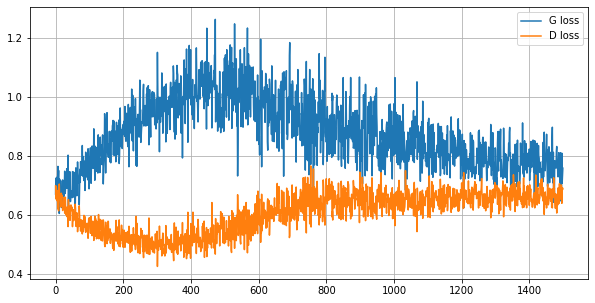

In [519]:
plt.figure(figsize=(10,5))
plt.plot(range(epochs), accumulated_gloss, label="G loss")
plt.plot(range(epochs), accumulated_dloss, label="D loss")
plt.legend()
plt.grid();

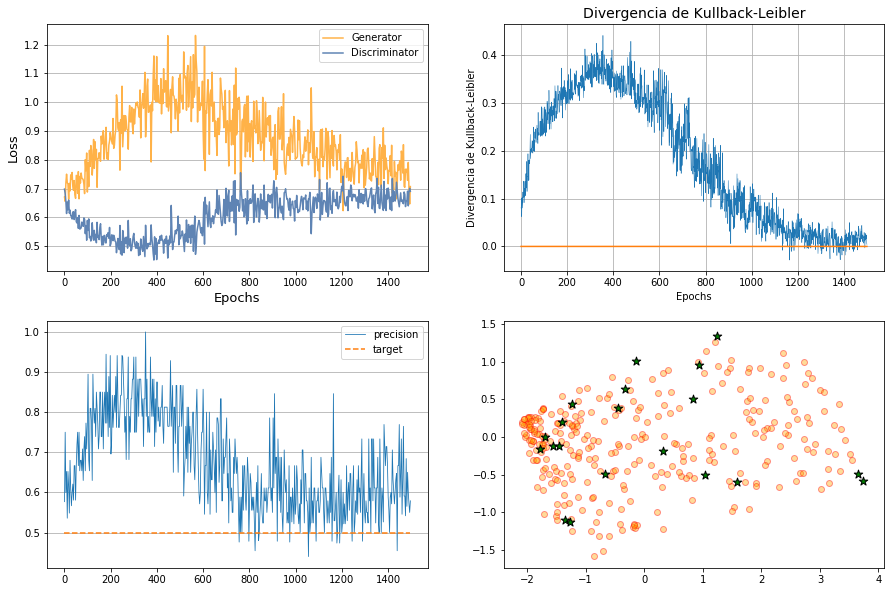

In [520]:
r = gan_utils.plot_results(syn_size=300);

In [521]:
bokeh_utils = EdwinRueda_utils.bokeh_utils()

precision, kld, loss_g, loss_d =  gan_utils.get_metrics(num_iter=200)
[pl, pq1, pq2, pq3, pu], pouts = boke_utils.boxtplot_values(np.array(precision), True, True)
[kl, kq1, kq2, kq3, ku], kouts = boke_utils.boxtplot_values(np.array(kld), True, True)
[gl, gq1, gq2, gq3, gu], gouts = boke_utils.boxtplot_values(np.array(loss_g), True, True)
[dl, dq1, dq2, dq3, du], douts = boke_utils.boxtplot_values(np.array(loss_d), True, True)

In [522]:
p = figure(plot_height=200, plot_width=350, x_range=cats, background_fill_color="#E8E8E8",)
cats = ["precision", "KLD", "loss_G", "loss_D"]
p.rect(cats, [pl, kl, gl, dl], width=.2, height=.001, line_color="black")
p.segment(cats, [pl, kl, gl, dl], cats, [pq1, kq1, gq1, dq1], line_color="black")
p.vbar(cats, width=.4, top=[pq2, kq2, gq2, dq2], bottom=[pq1, kq1, gq1, dq1], fill_color="#3B8686",
       line_color="black")
p.vbar(cats, width=.4, top=[pq3, kq3, gq3, dq3], bottom=[pq2, kq2, gq2, dq2], fill_color="#E08E79",
      line_color="black")
p.segment(cats, [pq3, kq3, gq3, dq3], cats, [pu, ku, gu, du], line_color="black")
p.rect(cats, [pu, ku, gu, du], width=.2, height=.001, line_color="black")
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = "white"
p.grid.grid_line_width = 1
p.yaxis.ticker = np.arange(0,1.1,.1)

#outliers
list_outs = [pouts, kouts, gouts, douts]
for idx in range(len(cats)):
    aux_var = list_outs[idx]
    if len(aux_var)>0:
        p.circle([cats[idx] for i in range(len(aux_var))], aux_var, line_color="#FF8000",
                fill_color="#FFA851", size=4)
    
show(p)

In [8]:
init = tf.keras.initializers.glorot_uniform()
init_weights = []
for w in D.get_weights():
    #print(w.shape)
    #print(init(w.shape).shape)
    init_weights.append(init(w.shape))